In [ ]:
import time

import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
# Connecting to colab
drive.mount("/content/drive")

NotImplementedError: ignored

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 892350854576225200
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8558954592539268986
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
data_path = "/content/drive/Shareddrives/CS539 Group 6/data"

In [ ]:
t0 = time.time()
with open(f"./combined.csv") as f:
  df = pd.read_csv(f)
t1 = time.time()

In [ ]:
print((t1 - t0) / 60)

8.757426770528157


In [ ]:
df_np = df.to_numpy()
df_np[:5, 1]

array([10, 0, 0, 0, 40], dtype=object)

In [ ]:
y = df_np[:, 0]

In [ ]:
# y = df[:, 1]
y[y == 'no_tumor'] = 0
y[y == 'meningioma_tumor'] = 1
y[y == 'glioma_tumor'] = 1
y[y == 'pituitary_tumor'] = 1
y = y.astype('float32')
X = df_np[:, 1:].astype('float32')
X_T = X.reshape(-1, 150, 150, 3)

In [ ]:
# Y = keras.utils.to_categorical(y)
Y = y
X_train, X_test, y_train, y_test = train_test_split(X_T, Y)

In [ ]:
image_size = 150
effnet = keras.applications.EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model = effnet.output
model = keras.layers.GlobalAveragePooling2D()(model)
model = keras.layers.Dropout(rate=0.5)(model)
model = keras.layers.Dense(1,activation='sigmoid')(model)
model = keras.models.Model(inputs=effnet.input, outputs = model)
model.compile(loss='binary_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs=12, verbose=1, batch_size=32)

Epoch 1/12
166/166 [==============================] - 46s 168ms/step - loss: 0.0887 - accuracy: 0.9676 - val_loss: 0.0622 - val_accuracy: 0.9813
Epoch 2/12
166/166 [==============================] - 26s 155ms/step - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.1044 - val_accuracy: 0.9626
Epoch 3/12
166/166 [==============================] - 26s 155ms/step - loss: 0.0247 - accuracy: 0.9928 - val_loss: 0.1106 - val_accuracy: 0.9745
Epoch 4/12
166/166 [==============================] - 26s 154ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.1657 - val_accuracy: 0.9371
Epoch 5/12
166/166 [==============================] - 26s 157ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.0721 - val_accuracy: 0.9915
Epoch 6/12
166/166 [==============================] - 26s 157ms/step - loss: 0.0193 - accuracy: 0.9932 - val_loss: 0.0536 - val_accuracy: 0.9932
Epoch 7/12
166/166 [==============================] - 26s 158ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 0.1588 - val_ac

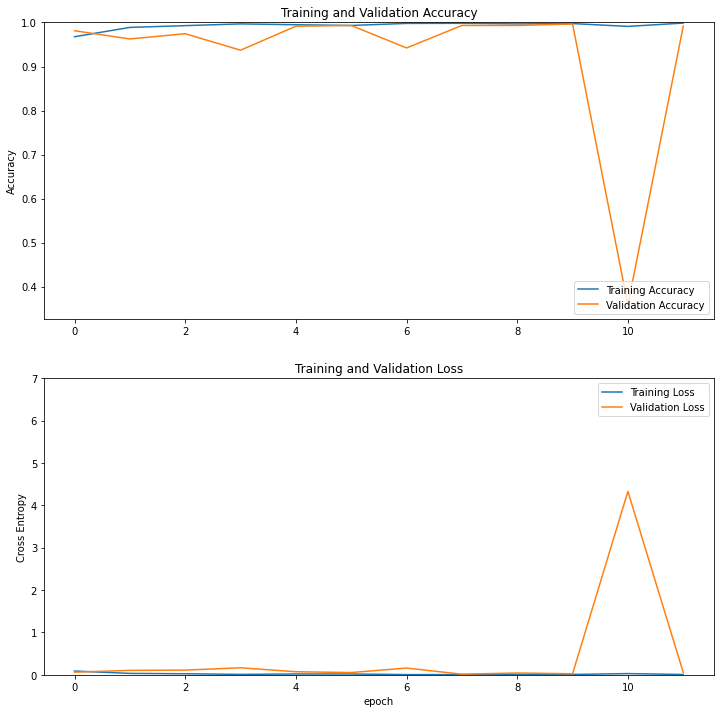

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,7.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
pred = model.predict(X_test)
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       505
         1.0       1.00      0.99      1.00      1452

    accuracy                           0.99      1957
   macro avg       0.99      1.00      0.99      1957
weighted avg       0.99      0.99      0.99      1957



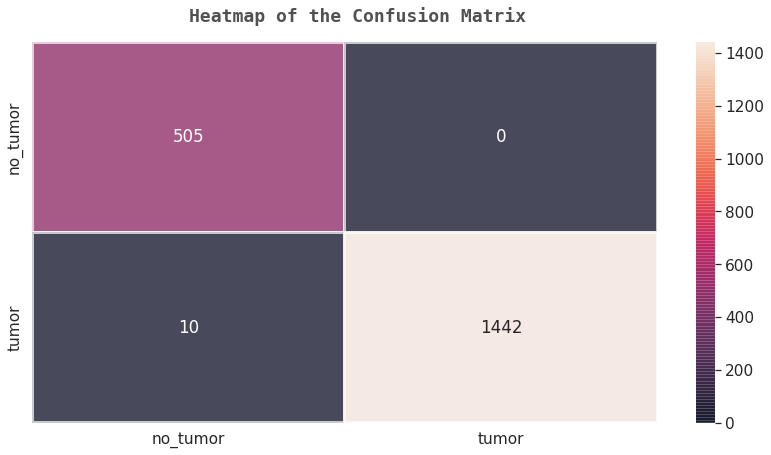

In [ ]:
labels = ['no_tumor', 'tumor']

sns.set(font_scale=1.4)

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
            alpha=0.7,linewidths=2, fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

plt.show()